### Human Activity Recognisation Dataset

Human Activity Recognition - HAR - has emerged as a key research area in the last years and is gaining increasing attention by the pervasive computing research community, especially for the development of context-aware systems. There are many potential applications for HAR, like: elderly monitoring, life log systems for monitoring energy expenditure and for supporting weight-loss programs, and digital assistants for weight lifting exercises.

Read more: https://github.com/Sarosh09/Human-Activity-Recognition

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB      
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, plot_confusion_matrix


In [2]:
# Import data
training = pd.read_csv("har_train.csv")
test =  pd.read_csv("har_validate.csv")
training.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [3]:
training.shape

(13737, 53)

In [4]:
training.columns

Index(['classe', 'roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'ma

In [5]:
test.shape

(5885, 53)

In [6]:
training['classe'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [7]:
training['classe'].value_counts()

A    3906
B    2658
E    2525
C    2396
D    2252
Name: classe, dtype: int64

In [8]:
training['classe'].value_counts()*100/len(training['classe'])

A    28.434156
B    19.349203
E    18.381015
C    17.441945
D    16.393681
Name: classe, dtype: float64

In [9]:
test['classe'].value_counts()*100/len(test['classe'])

A    28.445200
B    19.354291
E    18.385726
C    17.434155
D    16.380629
Name: classe, dtype: float64

In [10]:
# Create the X and Y
xtrain = training.drop('classe', axis=1)
ytrain = training.loc[:, 'classe']      #training['classe']

xtest = test.drop('classe', axis=1)
ytest = test.loc[:, 'classe']

In [11]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(xtrain, ytrain)

GaussianNB()

In [12]:
# Predict Output 
pred = model.predict(xtest)
mat = confusion_matrix(ytest, pred)       #Multiclass Confusion Matrix
print(mat)

[[1070   95  262  212   35]
 [ 127  685  145   76  106]
 [ 223  106  512  136   49]
 [ 102   35  271  441  115]
 [  51  239   95  143  554]]


/Users/amritapanjwani/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


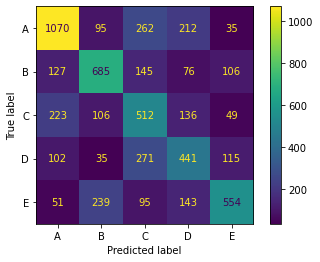

In [13]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, xtest, ytest)

In [14]:
# Printing the precision and recall, among other metrics
print(classification_report(pred, ytest, labels=["A", "B", "C","D","E"]))

              precision    recall  f1-score   support

           A       0.64      0.68      0.66      1573
           B       0.60      0.59      0.60      1160
           C       0.50      0.40      0.44      1285
           D       0.46      0.44      0.45      1008
           E       0.51      0.64      0.57       859

    accuracy                           0.55      5885
   macro avg       0.54      0.55      0.54      5885
weighted avg       0.55      0.55      0.55      5885



In [ ]:
# Wine quality:
# 0 to 10.... 3, 4, 5, 6, 7, 8
# TV = Quality
# Features


#
    